# TeleCom Churn Prediction

**Customers with partners and Dependents have lower churn rate than those who don't.** \
**Tenure: Customer tenure is length of time since the beginnig of customer relationship.Numer of months customer stayed with company.** \
**DSL-Digital Subscriber Line/Loop,is a technology where a DSL line is used to connect to internet and transmit digital data through copper telephone lines.** \
**Churn is measure of how many customers stop using a product.**

In [ ]:
# Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
from IPython.display import Image,display_svg, SVG
from scipy.stats import chi2_contingency

In [ ]:
# Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/UNZIP_FOR_NOTEBOOKS_FINAL (1)/DATA/Telco-Customer-Churn.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# SETTING DISPLAY OPTIONS TO SEE 21 COLUMNS
pd.set_option('display.max_columns',21)

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Checking Null Values

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Inference : There are no NULL Values.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
# GETTING STATISTICAL INFORMATION ABOUT NUMERICAL COLUMNS
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# CHECKING NUMBER OF UNIQUE VALUES IN EACH COLUMN
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

### Checking percentage of Yes/No in Churn Column

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
trace = go.Pie(labels=df['Churn'].value_counts().keys().tolist(),
            values = df["Churn"].value_counts().values.tolist(),
            marker = dict(colors = ['royalblue','red'],
                          line = dict(color = "white", width =  1.0)
                          ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn",
                        plot_bgcolor = "rgb(211,244,230)",
                        paper_bgcolor = "rgb(200,243,313)",
                       )
                  )
layout = layout
fig = go.Figure(data=[trace],layout=layout)
py.iplot(fig)

In [ ]:
# CHECKING NUMBER OF UNIQUE VALUES IN CUSTOMERID COLUMN
print('\033[1m'+'Number of Unique Customers are',df['customerID'].nunique())
print('\033[1m'+'Number of Permanent Customers are',df['Churn'].value_counts()['No'])
print('\033[1m'+'Number of Temparory Customers are',df['Churn'].value_counts()['Yes'])

Number of Unique Customers are 7032
Number of Permanent Customers are 5163
Number of Temparory Customers are 1869


In [ ]:
# CHEKING NUMBER OF MALE AND FEMALE CUSTOMERS
print('\033[1m'+'Number of Male Customers are',df['gender'].value_counts()['Male'])
print('\033[1m'+'Number of Female Customers are',df['gender'].value_counts()['Female'])

Number of Male Customers are 3549
Number of Female Customers are 3483


In [ ]:
# CHECKING NUMBER OF SENIOR CITIZENS
print('\033[1m'+'Number of Senior Citizen Customers are',df['SeniorCitizen'].value_counts()[1])
print('\033[1m'+'Number of Non-Senior Citizen Customers are',df['SeniorCitizen'].value_counts()[0])

Number of Senior Citizen Customers are 1142
Number of Non-Senior Citizen Customers are 5890


In [ ]:
# CHEKING NUMBER OF PARTNERS AND DEPENDENTS
print('\033[1m'+'Number of Partner Customers are',df['Partner'].value_counts()['Yes'])
print('\033[1m'+'Number of Non-Partner Customers are',df['Partner'].value_counts()['No'])
print('\033[1m'+'Number of Dependent Customers are',df['Dependents'].value_counts()['Yes'])
print('\033[1m'+'Number of Non-Dependent Customers are',df['Dependents'].value_counts()['No'])

Number of Partner Customers are 3393
Number of Non-Partner Customers are 3639
Number of Dependent Customers are 2099
Number of Non-Dependent Customers are 4933


### Countplot of Churn Column

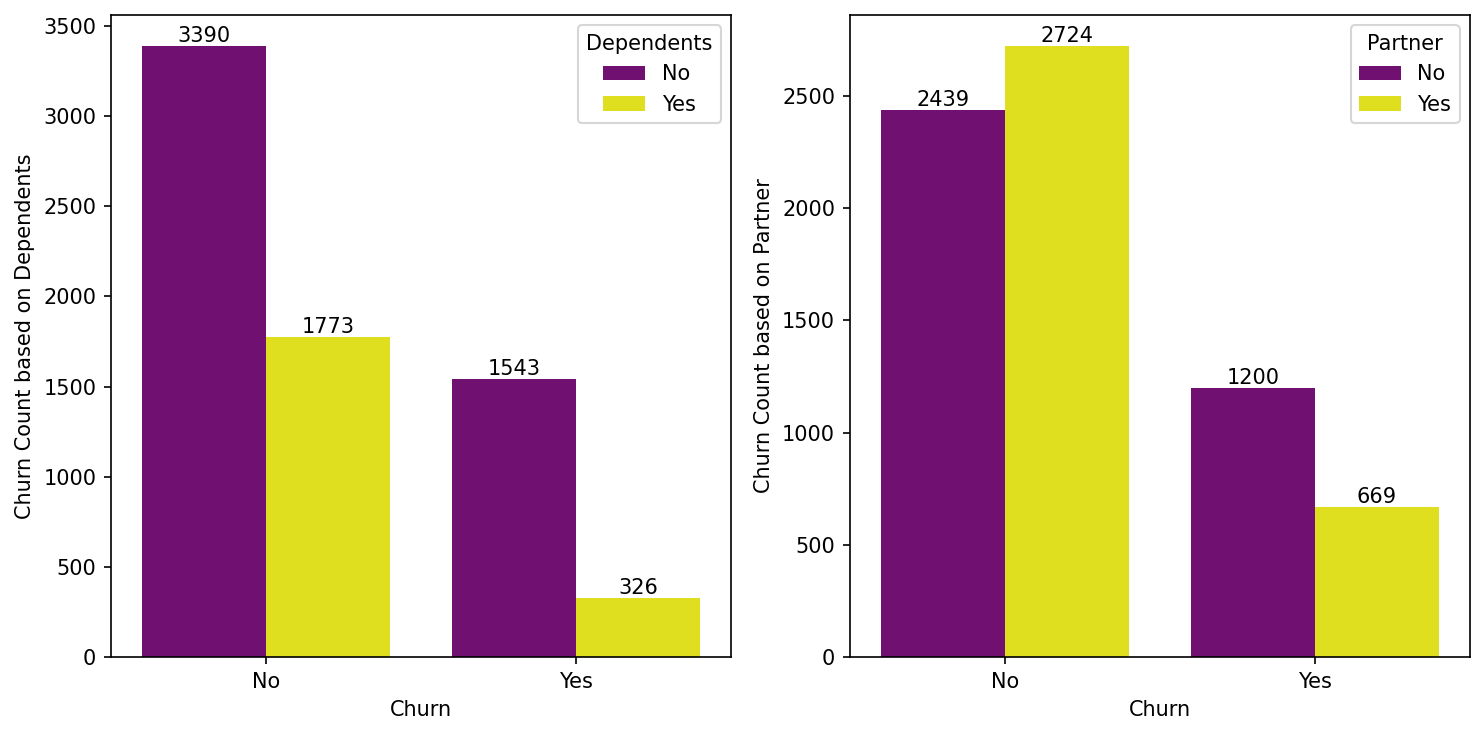

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2,dpi=150,figsize=(10,5))

churn_dependents_countplot = sns.countplot(data=df,x='Churn',hue='Dependents',
                                           ax=ax[0],palette={'Yes':'yellow',
                                                            'No':'purple'},hue_order=['No','Yes'])
ax[0].set_ylabel('Churn Count based on Dependents')
# Getting values on top of bar
for i in churn_dependents_countplot.containers:
    churn_dependents_countplot.bar_label(i,)

churn_partners_countplot = sns.countplot(data=df,x='Churn',hue='Partner',
                                         ax=ax[1],palette={'Yes':'yellow',
                                                            'No':'purple'},hue_order=['No','Yes'])
ax[1].set_ylabel('Churn Count based on Partner')
# Getting values on top of bar
for i in churn_partners_countplot.containers:
    churn_partners_countplot.bar_label(i,)

    
plt.tight_layout()
plt.show()

**Inference : On comparing dependent/partner customers who churn and not churn,we can say that**
* **Most Dependent Customers are not Churn Customers**
* **Most Partner Customers are not Churn Customers**

In [ ]:
# CHEKING NUMBER OF CUSTOMERS WHO HAVE PHONE SERVICE
print('\033[1m'+'Number of Customers who are provided with Phone Service are',
      df['PhoneService'].value_counts()['Yes'])
print('\033[1m'+'Number of Customers who are Not provided with Phone Service are',
      df['PhoneService'].value_counts()['No'])

Number of Customers who are provided with Phone Service are 6352
Number of Customers who are Not provided with Phone Service are 680


### Countplot of Churn Column based on PhoneService

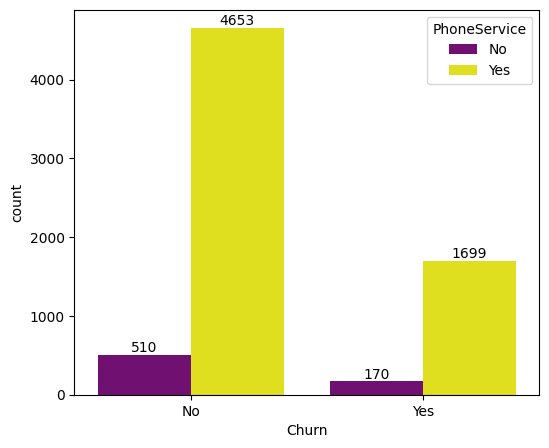

In [ ]:
plt.figure(figsize=(6,5),dpi=100)
churn_phoneservice_countplot = sns.countplot(data=df,x='Churn',hue='PhoneService',
                                             palette={'Yes':'yellow',
                                                      'No':'purple'},hue_order=['No','Yes'])
# Getting values on top of bar
for i in churn_phoneservice_countplot.containers:
    churn_phoneservice_countplot.bar_label(i,)


**Inference : Customers who are provided with PhoneService are more likely to not Churn.**

#### Distribution of Total Charges based on Churn Column

<Axes: xlabel='Churn', ylabel='TotalCharges'>

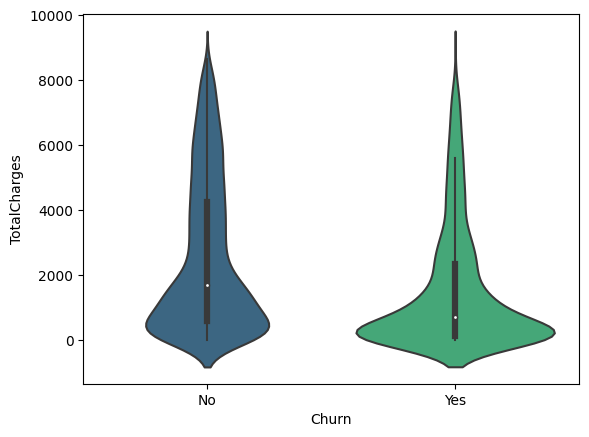

In [ ]:
sns.violinplot(data=df,y='TotalCharges',x='Churn',palette='viridis')

In [ ]:
px.box(data_frame=df,x='TotalCharges',title='Boxplot of Total Charges',color='Churn')

#### Distribution of Total Charges based on Contract type

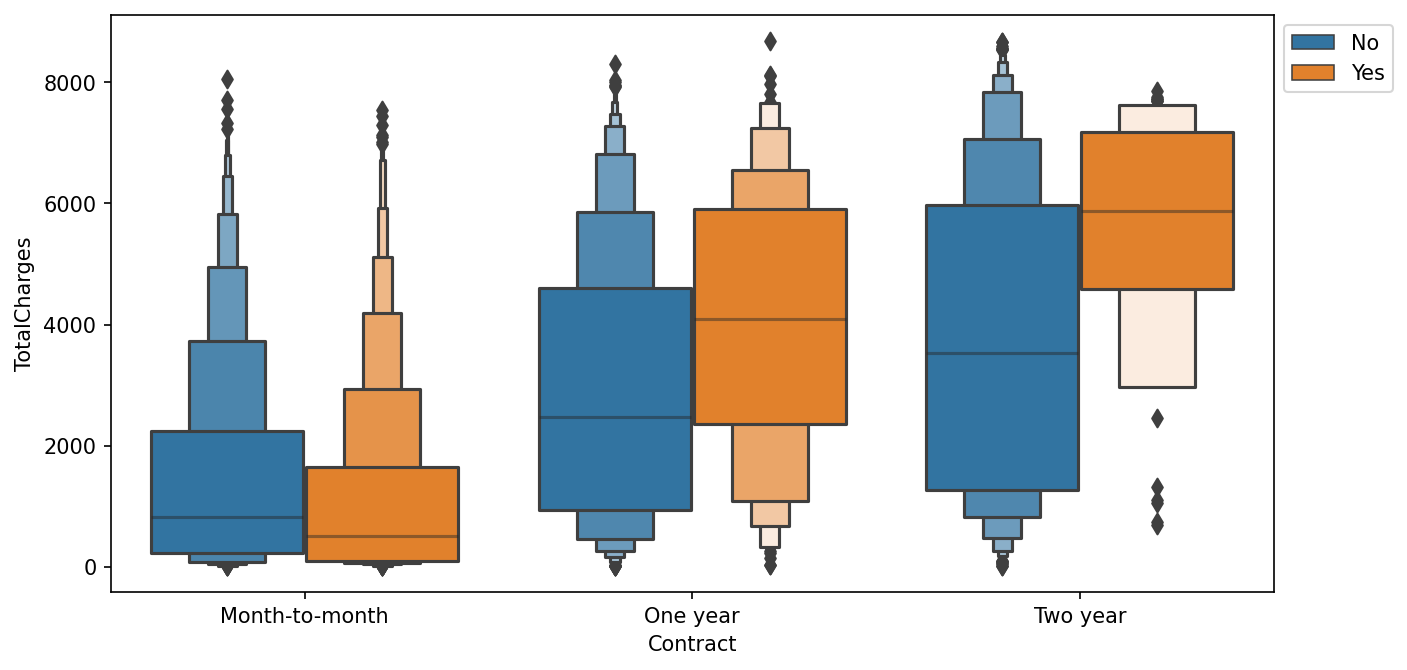

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
sns.boxenplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(bbox_to_anchor=(1,1))

### Correlation between Categorical Features without making dummy variables
* For categorical features,correlation is called association

## Using Cramer's V - Based on Pearson's Chi-Square Test
* Output is in range of (0,1),where 0 means no association and 1 means full association

In [ ]:
def cramers_V(feat1,feat2):
    # CROSS TABLE BUILDING
    crosstab = np.array(pd.crosstab(feat1,feat2,rownames=None,colnames=None))
    # KEEPING OF TEST STATISTIC OF CHI2 TEST
    stat = chi2_contingency(crosstab)[0]
    # NUMBER OF OBSERVATIONS
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

In [ ]:
rows = []
for feat1 in df.drop('customerID',axis=1):
    col = []
    for feat2 in df.drop('customerID',axis=1):
        cramers = cramers_V(df[feat1],df[feat2])
        col.append(round(cramers,3))
    rows.append(col)

cramers_results = np.array(rows)
corr_df = pd.DataFrame(cramers_results,columns=df.drop('customerID',axis=1).columns,
                       index=df.drop('customerID',axis=1).columns)

In [ ]:
corr_df['Churn'].sort_values(ascending=False)

Churn               0.999
TotalCharges        0.925
MonthlyCharges      0.301
Contract            0.168
tenure              0.151
OnlineSecurity      0.120
TechSupport         0.117
InternetService     0.104
PaymentMethod       0.092
OnlineBackup        0.085
DeviceProtection    0.079
StreamingTV         0.053
StreamingMovies     0.053
PaperlessBilling    0.037
Dependents          0.026
SeniorCitizen       0.023
Partner             0.022
MultipleLines       0.002
PhoneService        0.000
gender              0.000
Name: Churn, dtype: float64

### Labelling "Yes" with 1 and "No" with 0 in Yes/No columns

In [ ]:
df['Partner'] = df['Partner'].replace(to_replace=['Yes','No'],value=[1,0])
df['Dependents'] = df['Dependents'].replace(to_replace=['Yes','No'],value=[1,0])
df['PhoneService'] = df['PhoneService'].replace(to_replace=['Yes','No'],value=[1,0])
df['PaperlessBilling'] = df['PaperlessBilling'].replace(to_replace=['Yes','No'],value=[1,0])

### Getting Dummy Variables

In [ ]:
pd.set_option('display.max_columns',43)
dummies_df = pd.get_dummies(df.drop('customerID',axis=1),drop_first=False)
dummies_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,1,0,1,29.85,29.85,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0
2,0,0,0,2,1,1,53.85,108.15,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
4,0,0,0,2,1,1,70.70,151.65,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,24,1,1,84.80,1990.50,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0
7028,0,1,1,72,1,1,103.20,7362.90,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
7029,0,1,1,11,0,1,29.60,346.45,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0
7030,1,1,0,4,1,1,74.40,306.60,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1


In [ ]:
dummies_corr_df = dummies_df.corr()

In [ ]:
dummies_corr_df.drop('Churn_No',axis=1,inplace=True)
dummies_corr_df.drop(['Churn_Yes','Churn_No'],axis=0,inplace=True)

In [ ]:
dummies_corr_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
SeniorCitizen,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.001819,-0.001819,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,0.150541
Partner,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,0.001379,-0.001379,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.129394,-0.000286,0.143346,-0.135626,-0.000286,0.141849,-0.146702,-0.000286,0.153556,-0.108875,-0.000286,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,-0.149982
Dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.010349,0.010349,0.023388,0.001078,-0.024307,0.051593,-0.164101,0.138383,-0.186979,0.138383,0.080786,-0.137421,0.138383,0.023639,-0.128053,0.138383,0.013900,-0.171164,0.138383,0.063053,-0.099912,0.138383,-0.016499,-0.078245,0.138383,-0.038375,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,-0.163128
tenure,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.005285,0.005285,-0.323891,-0.007877,0.332399,0.013786,0.017930,-0.037529,-0.265987,-0.037529,0.328297,-0.314769,-0.037529,0.361138,-0.314820,-0.037529,0.361520,-0.264363,-0.037529,0.325288,-0.246814,-0.037529,0.280264,-0.252890,-0.037529,0.285402,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181,-0.354049
PhoneService,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.007515,-0.007515,0.315218,-1.000000,0.279530,-0.452255,0.290183,0.171817,-0.058546,0.171817,-0.091676,-0.092579,0.171817,-0.052133,-0.075421,0.171817,-0.070076,-0.055102,0.171817,-0.095138,-0.123159,0.171817,-0.021383,-0.111273,0.171817,-0.033477,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,0.011691
PaperlessBilling,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.011902,-0.011902,-0.151974,-0.016696,0.163746,-0.063390,0.326470,-0.320592,0.267592,-0.320592,-0.004051,0.144218,-0.320592,0.127056,0.166253,-0.320592,0.104079,0.229875,-0.320592,0.037536,0.046715,-0.320592,0.224241,0.058987,-0.320592,0.211583,0.168296,-0.052278,-0.146281,-0.017469,-0.013726,0.208427,-0.203981,0.191454
MonthlyCharges,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.013779,-0.013779,-0.338514,-0.248033,0.490912,-0.161368,0.787195,-0.763191,0.360220,-0.763191,0.296447,0.210126,-0.763191,0.441529,0.171057,-0.763191,0.482607,0.321267,-0.763191,0.338301,0.016015,-0.763191,0.629668,0.017271,-0.763191,0.627235,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568,0.192858
TotalCharges,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.000048,0.000048,-0.396765,-0.113008,0.469042,-0.052190,0.360769,-0.374878,-0.064515,-0.374878,0.412619,-0.177633,-0.374878,0.510100,-0.189485,-0.374878,0.522881,-0.0842

In [ ]:
dummies_corr_df['Churn_Yes'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
OnlineBackup_No internet service          -0.227578
InternetService_No                        -0.227578
DeviceProtection_No internet service      -0.227578
TechSupport_No internet service           -0.227578
StreamingTV_No internet service           -0.227578
StreamingMovies_No internet service       -0.227578
OnlineSecurity_No internet service        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

### Correlation Plot of Features  with Churn Column

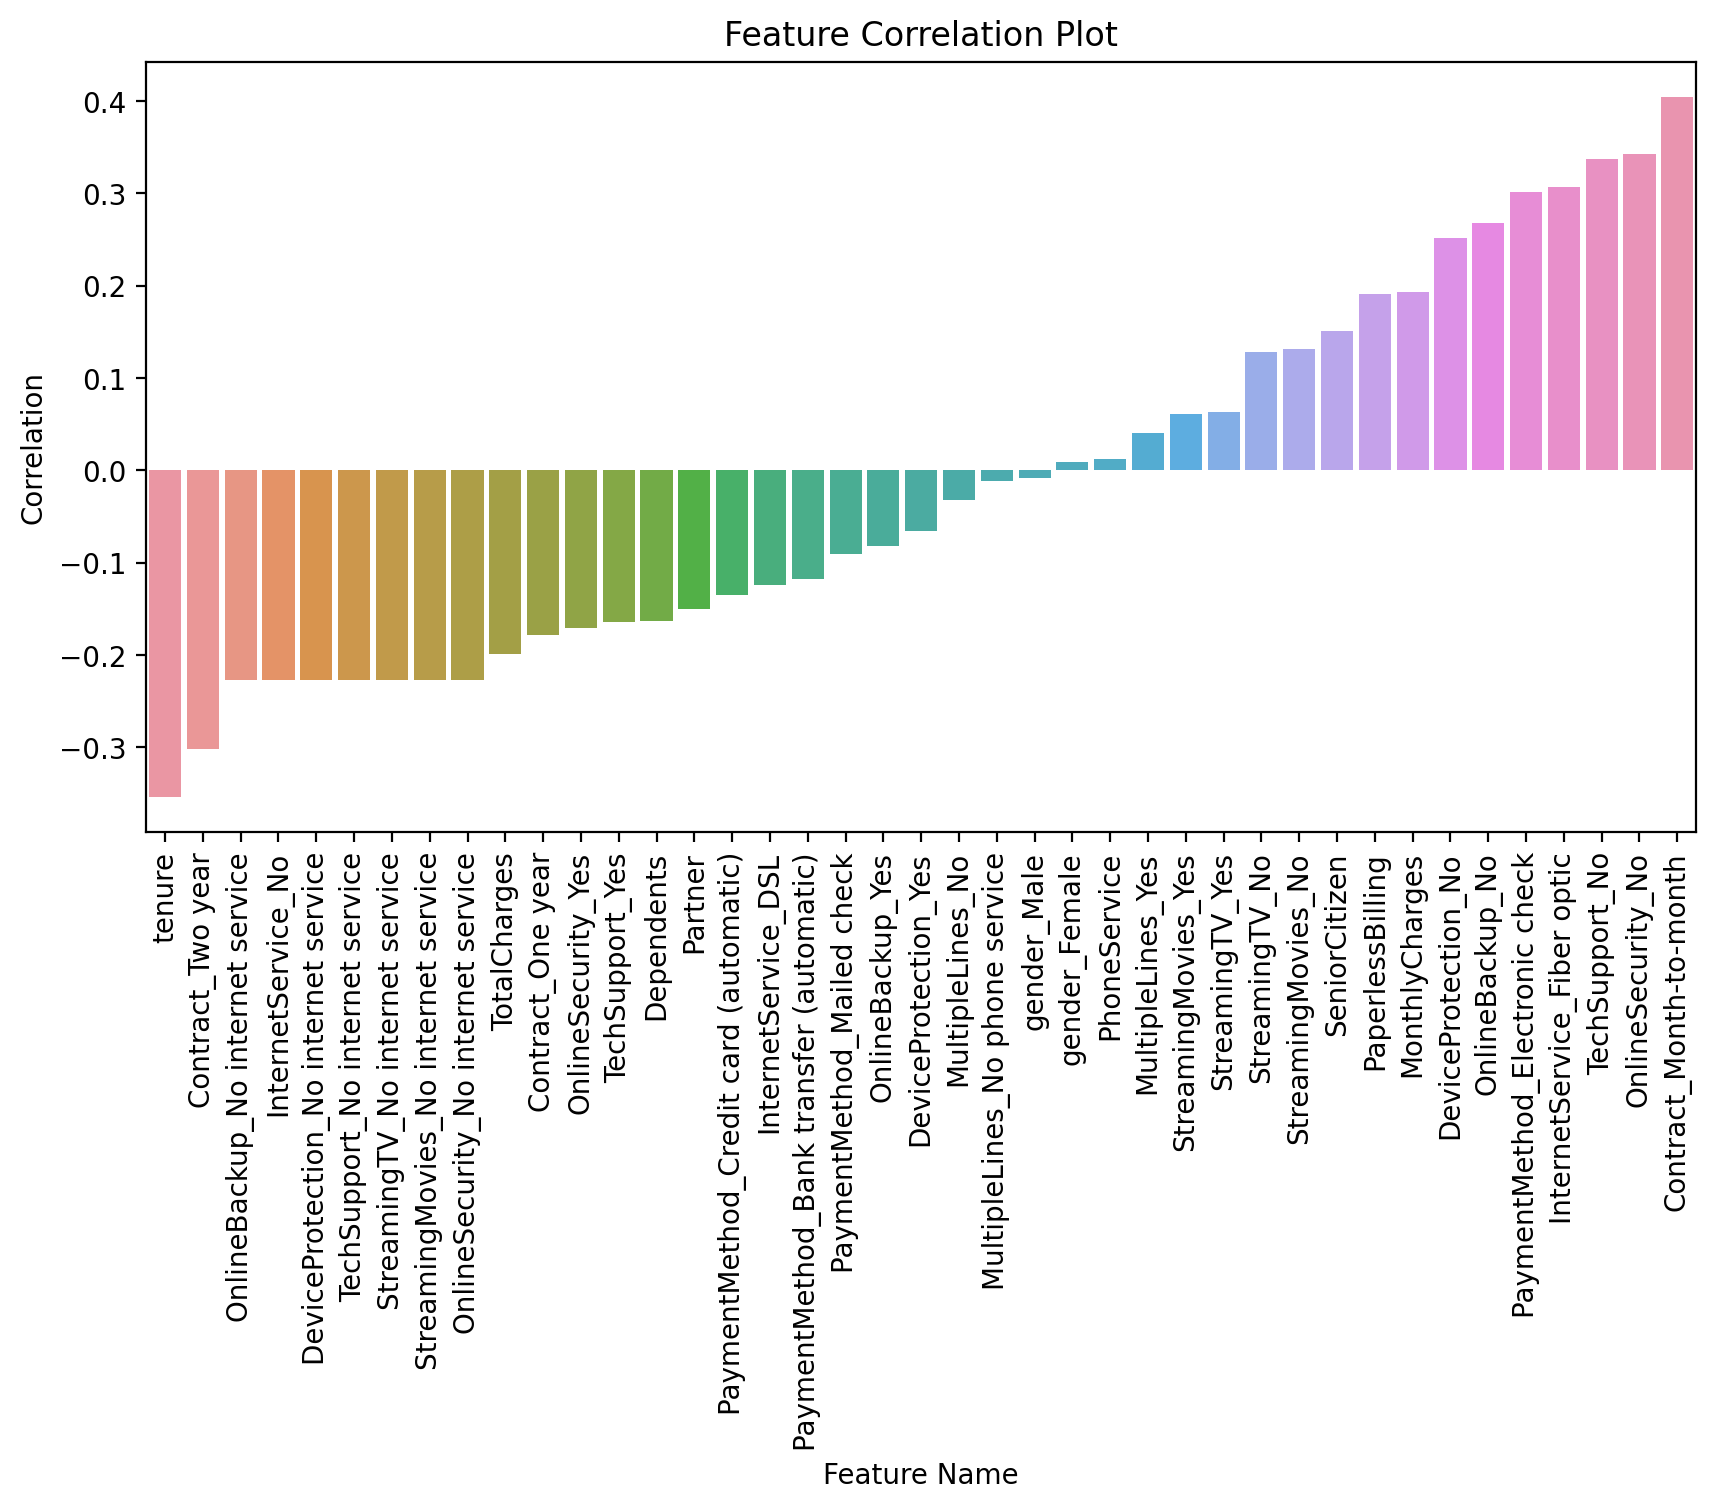

In [ ]:
plt.figure(figsize=(10,5),dpi=200)

corr_plot = sns.barplot(x=dummies_corr_df['Churn_Yes'].sort_values().iloc[0:].index,
            y=dummies_corr_df['Churn_Yes'].sort_values().iloc[0:].values,width=0.85)

# Getting values on top of bar
#for i in corr_plot.containers:
   # corr_plot.bar_label(i,fmt='%.2f')

plt.title('Feature Correlation Plot')
plt.xlabel('Feature Name')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

#### Histogram plot of Tenure Column

<Axes: xlabel='tenure', ylabel='Count'>

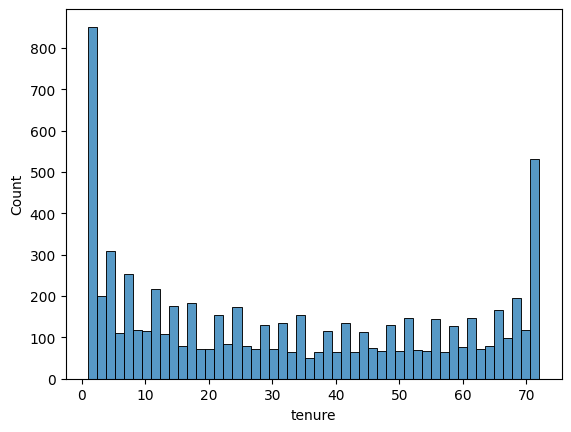

In [ ]:
sns.histplot(data=df,x='tenure',bins=50)

#### Histogram plot of Tenure Column based on Churn&Contract Column

<Figure size 1500x1200 with 0 Axes>

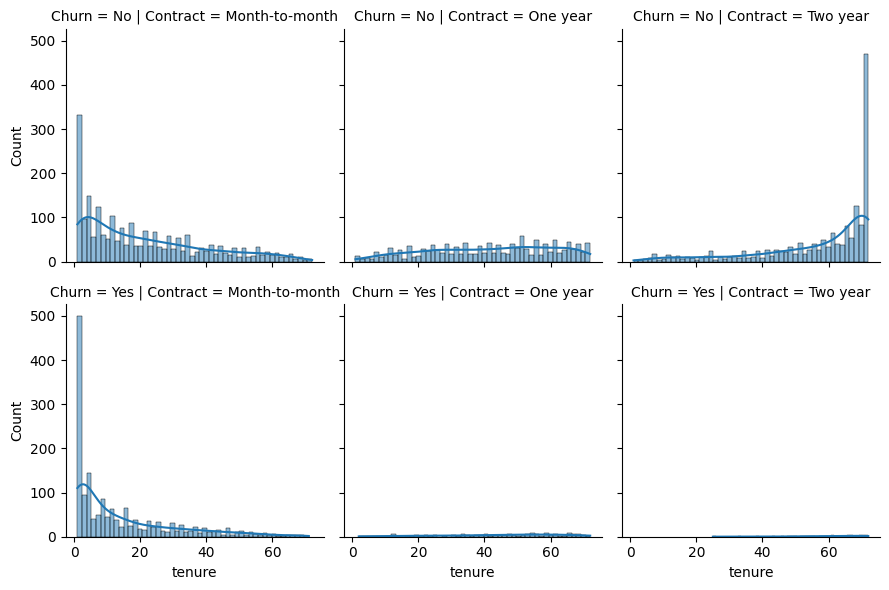

In [ ]:
plt.figure(figsize=(10,8),dpi=150)
plot = sns.FacetGrid(data=df,row='Churn',col='Contract')
plot.map(sns.histplot,'tenure',bins=50,kde=True)

#### Scatterplot between Total Charges and Monthly Charges based on Churn Column

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

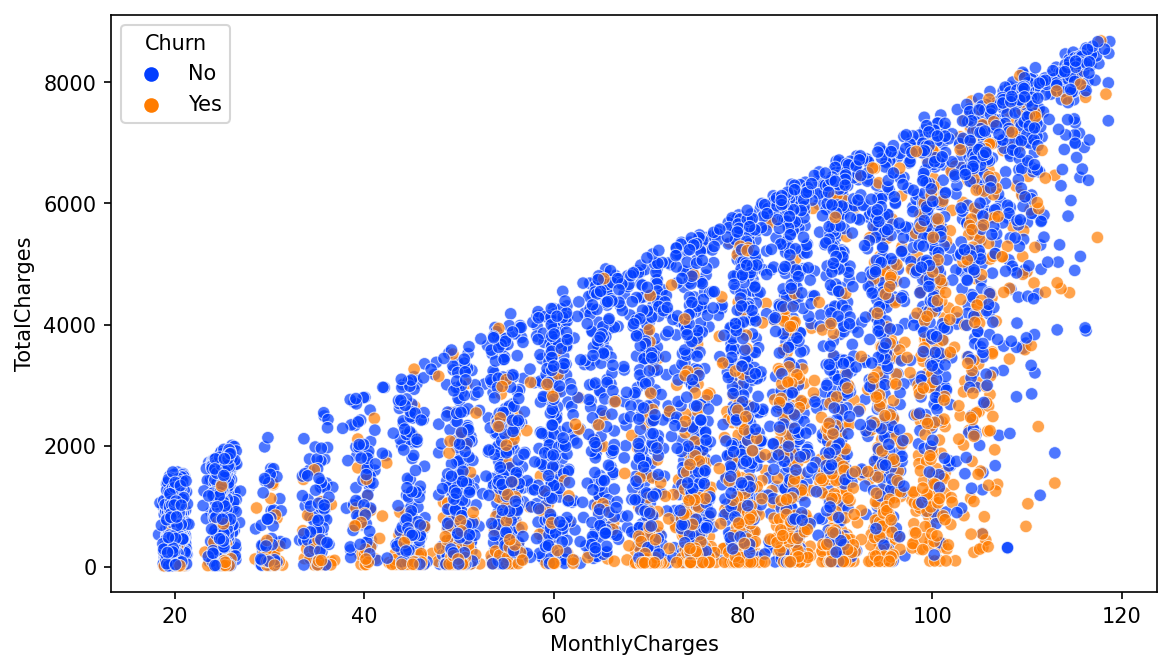

In [ ]:
plt.figure(figsize=(9,5),dpi=150)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.7,palette='bright')

### Creating Cohorts based on Tenure
**In Data Analysis,Cohort is a group of users who share a common characteristic that is identified in analysis.** 

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort,we are going to calculate the Churn rate (percentage that had Yes Churn) per cohort.We have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate.This makes sense as you are less likely to stop service the longer you've had it.**

In [ ]:
df['tenure'].nunique()

72

#### Countplot of Tenure Column

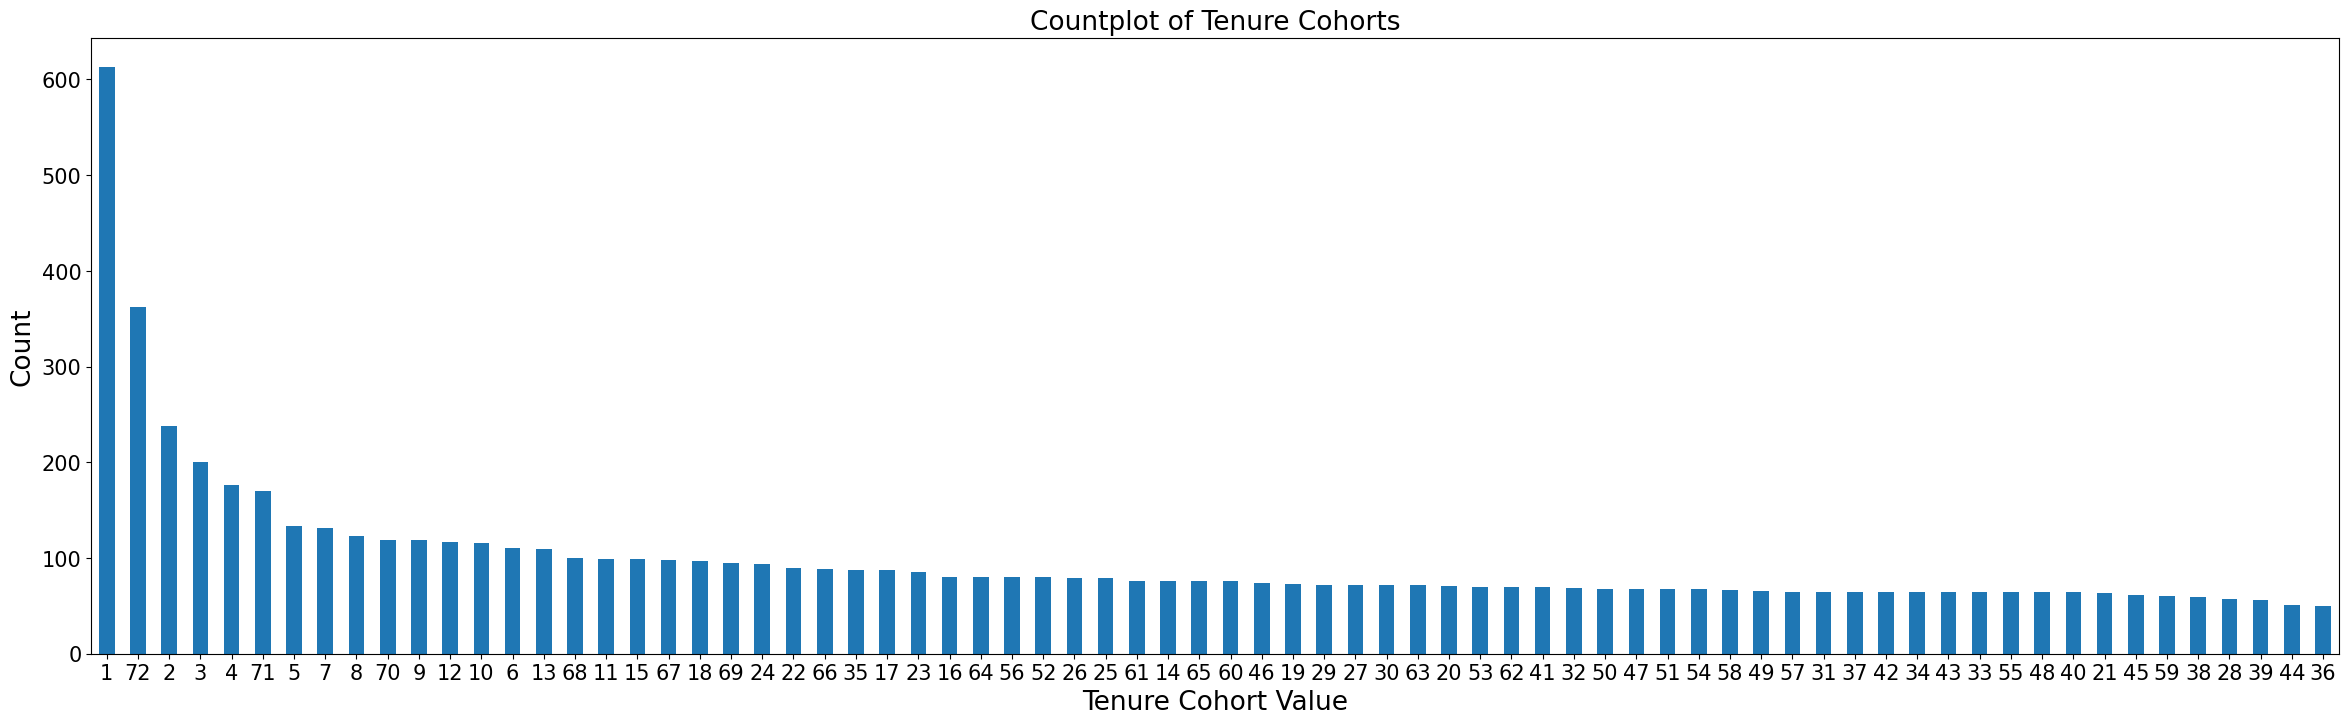

In [ ]:
df['tenure'].value_counts().plot(kind='bar',figsize=(29,8),fontsize=15)
plt.title('Countplot of Tenure Cohorts',fontsize=19)
plt.xlabel('Tenure Cohort Value',fontsize=19)
plt.ylabel('Count',fontsize=19)
plt.xticks(rotation=0,horizontalalignment='center')
plt.show()

#### Grouping by Churn and tenure columns and then getting no_churn and yes_churn records and applying size(aggregate function)

In [ ]:
no_churn = df.groupby(['Churn','tenure']).size()['No']
yes_churn = df.groupby(['Churn','tenure']).size()['Yes']

In [ ]:
churn_rate =  100 * yes_churn / (yes_churn + no_churn)
churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Length: 72, dtype: float64

#### Plotting Churn Rate per month of tenure

Text(0, 0.5, 'Churn Rate/Percentage')

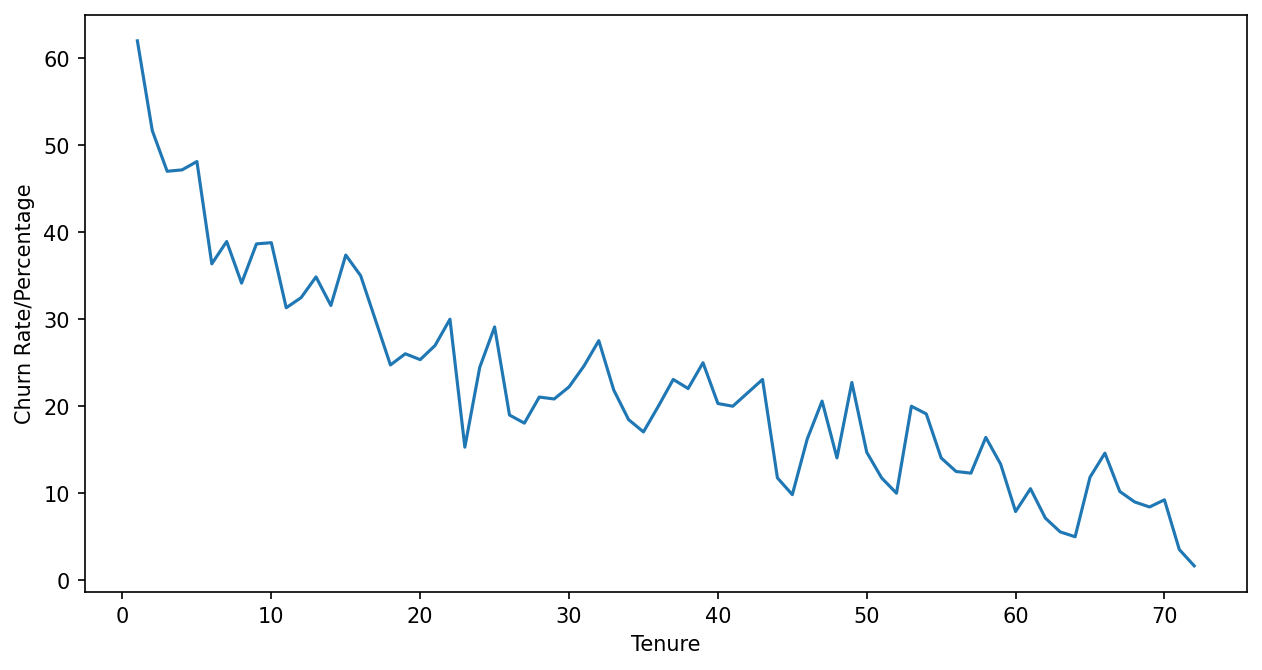

In [ ]:
plt.figure(figsize=(10,5),dpi=150)
plt.plot(churn_rate.index,churn_rate.values)
plt.xlabel('Tenure')
plt.ylabel('Churn Rate/Percentage')

**Inference : As Tenure(Number of months) is increasing Churn Rate decreasing.**

### Broader Cohort Groups
**Based on the tenure column values,we are going to create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [ ]:
def create_group(tenure_value):
    if tenure_value in range(1,12+1):
        return '0-12 Months'
    elif tenure_value in range(13,24+1):
        return '12-24 Months'
    elif tenure_value in range(25,48+1):
        return '24-48 Months'
    else:
        return 'over 48 Months'

In [ ]:
df['Tenure Cohort'] = df['tenure'].apply(func=create_group)

In [ ]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


#### Scatterplot between Total Charges and Monthl Charges based on Tenure Cohort Groups

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

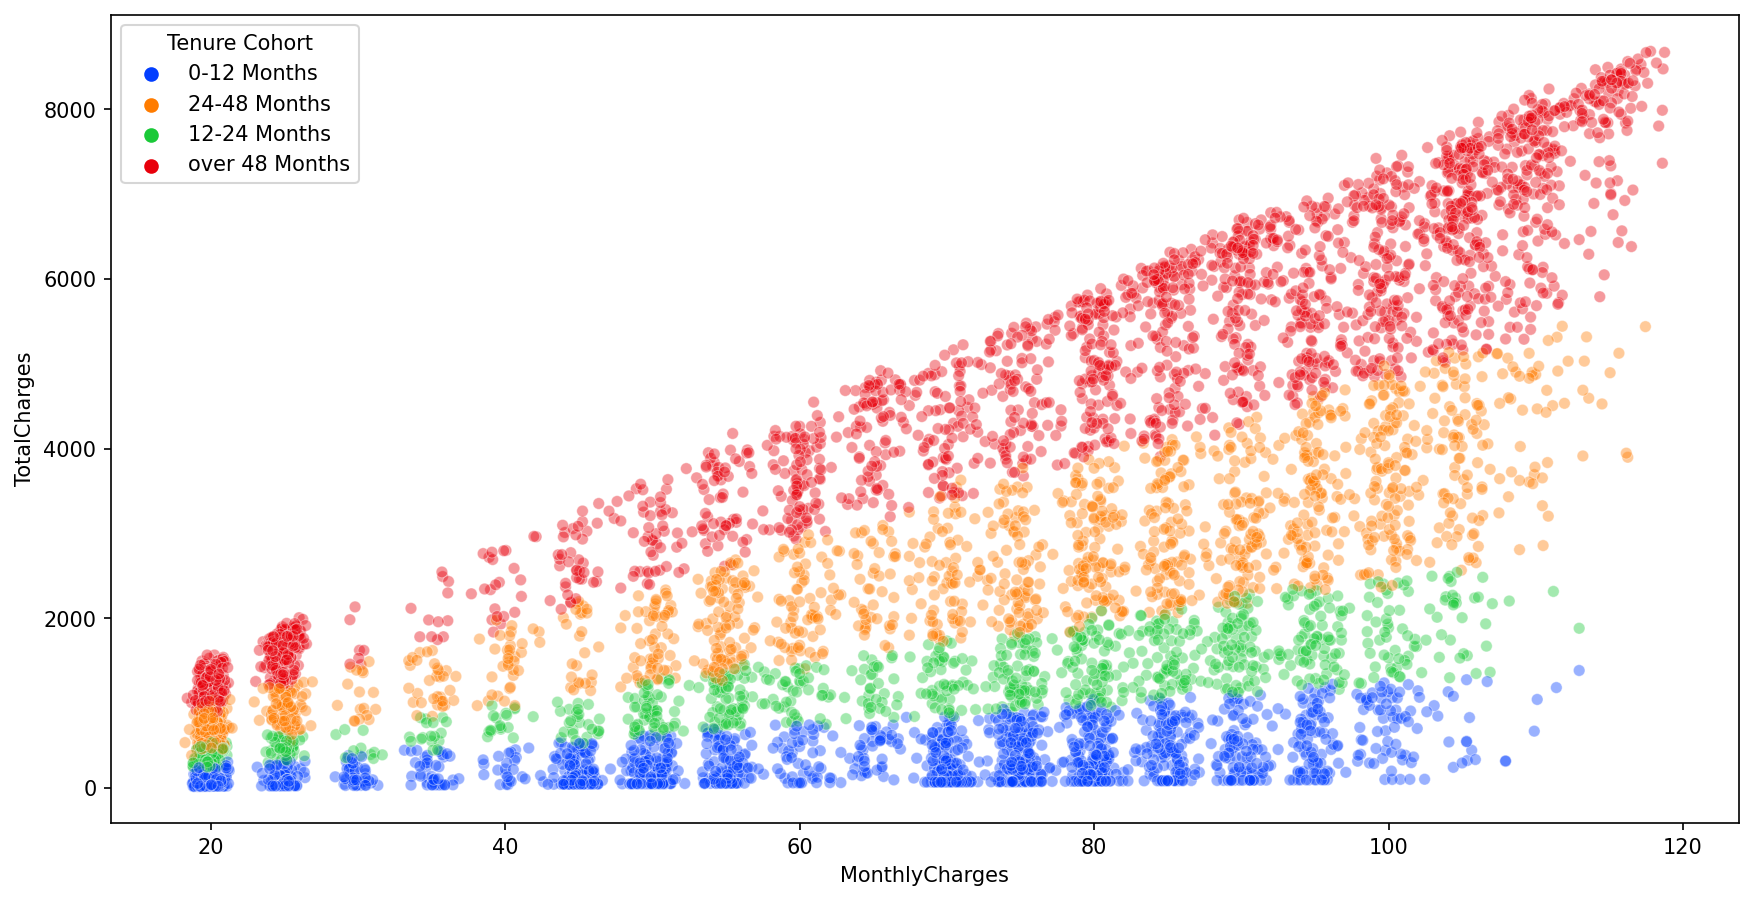

In [ ]:
plt.figure(figsize=(14,7),dpi=150)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',
                alpha=0.4,palette='bright',s=31)

#### Countplot of Tenure Cohort based on Churn

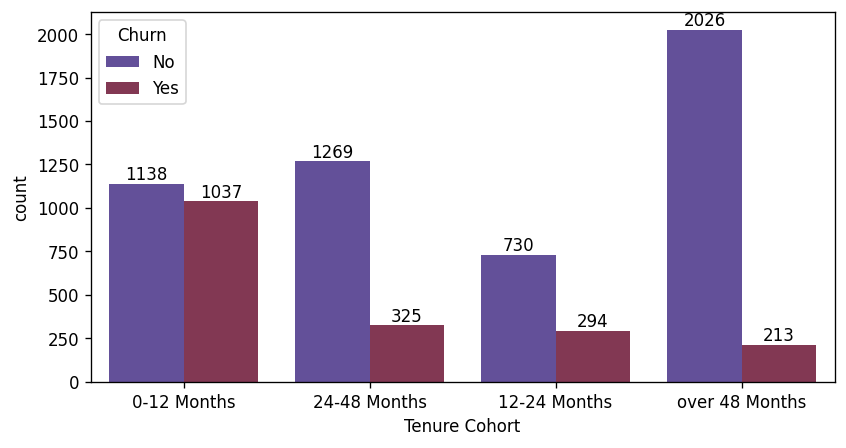

In [ ]:
plt.figure(figsize=(8,4),dpi=120)
plot = sns.countplot(data=df,x='Tenure Cohort',hue='Churn',palette='twilight')

for i in plot.containers:
    plot.bar_label(i,)

#### Categorical Grid Plot of Tenure Cohort based on Contract and Churn Columns

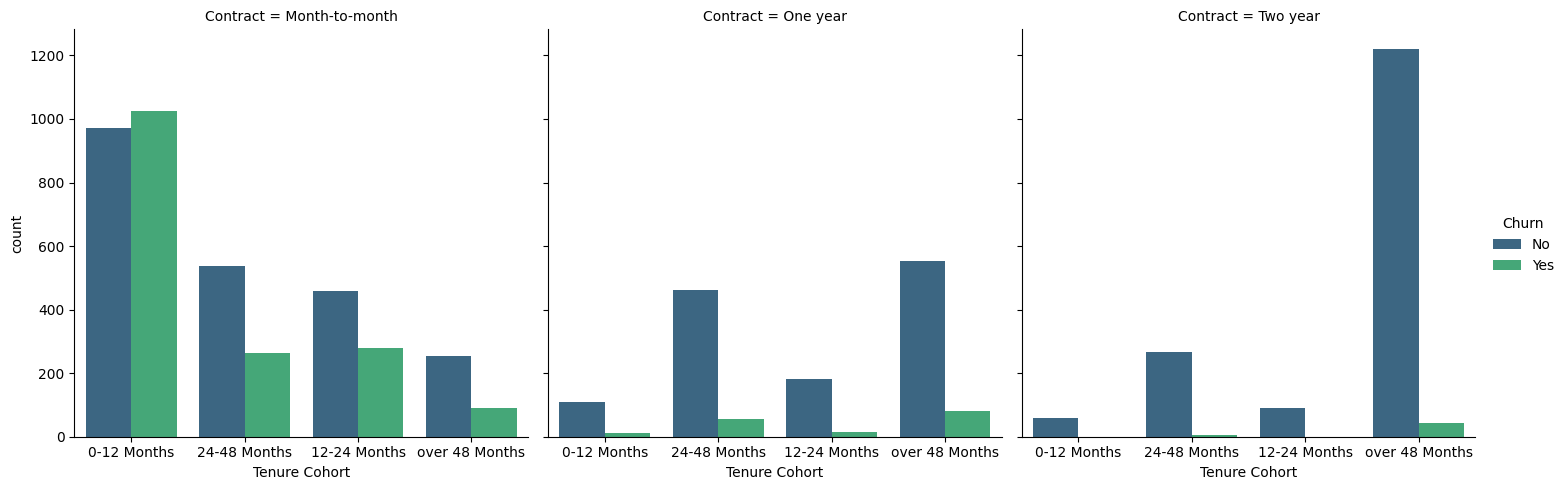

In [ ]:
sns.catplot(data=df,x='Tenure Cohort',col='Contract',hue='Churn',kind='count',palette='viridis')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,No,12-24 Months
7028,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,No,over 48 Months
7029,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,No,0-12 Months
7030,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,Yes,0-12 Months


**Dropping CustomerID column**

In [ ]:
df.drop('customerID',axis=1,inplace=True)

**Creating X and y sets**

In [ ]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#### Getting Dummy Values for Categorical features in X data

In [ ]:
X = pd.get_dummies(X)

#### IMPORTING REQUIRED LIBRARIES FROM SCIKIT LEARN

In [ ]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import recall_score,roc_auc_score,roc_curve,auc,precision_recall_curve

### **Dealing with Imbalanced Data by SMOTE**

In [ ]:
# CREATING INSTANCE OF 
smote = SMOTE(sampling_strategy='minority')
# RESAMPLING X AND Y DATA WITH SOMTE
X_sampled , y_sampled = smote.fit_resample(X,y)

In [ ]:
# GETTING VALUE COUNTS OF Y DATA
y_sampled.value_counts()

No     5163
Yes    5163
Name: Churn, dtype: int64

## Predictive Modelling

### General Method
1. **Splitting the data.**
2. **Creating Parameter Grids for some ML Classification Models.**
3. **Using RandomizedSearchCV for getting best parameters.**
4. **Comparing Confusion Matrix and Accuracy Score of those RandomizedSearchCV models.**

### Ensembling Techniques
**1.Voting Ensemble Method**

**2.Bagging Ensemble Method**

**3.Boosting Ensemble Method**

## General Method
**First,i will use Logistic Regression,Support Vector Machine Classifier,K-Nearest Neighbors Classifier,Decision Tree Classifier,Random Forest Classifier algorithms.And chack performance of those models.**

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.25, random_state=31,stratify=y_sampled)

In [ ]:
print('Shape of X_train : ',X_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (7744, 45)
Shape of X_test :  (2582, 45)
Shape of y_train :  (7744,)
Shape of y_test :  (2582,)


In [ ]:
y_train.value_counts()

No     3872
Yes    3872
Name: Churn, dtype: int64

In [ ]:
y_test.value_counts()

No     1291
Yes    1291
Name: Churn, dtype: int64

**Creating Grids for Machine Learning Algorithms**

In [ ]:
log_param_grid = {'penalty':['l1','l2','elasticnet'],
                 'C':[-3,0,1,1.5,2,5,10],
                 'solver':['newton-cg','lbfgs','liblinear','saga'],
                 'multi_class':['auto','ovr'],
                 'max_iter':[50,100,150],
                 'l1_ratio':[0,0.25,0.5,0.75,0.9,1]          
                 }
svc_param_grid = {'C':[1],
                 'kernel':['rbf'],
                 'gamma':['scale','auto']
                 }
knn_param_grid = {'n_neighbors':[3,5,7,10,15,20,25],
                 'weights':['uniform','distance'],
                 'algorithm':['auto','ball_tree','kd_tree','brute'],
                 'p':[1,2]
                 }
dt_param_grid = {'criterion':['gini','entropy'],
                 'splitter':['best','random'],
                 'max_depth':[3,4,5,6,None],
                 'min_samples_split':[25,30,40],
                 'max_features':['auto','sqrt','log2']
                }
rf_param_grid = {'n_estimators':[50,100,150],
                'criterion':['gini','entropy'],
                'max_depth':[3,4,5,6,None],
                'min_samples_split':[25,30,40],
                'max_features':['sqrt','log2'],
                }

**Creating instances of RandomizedSearchCV models with different ML models along with their parameter grid**

In [ ]:
randomized_log_model = RandomizedSearchCV(LogisticRegression(class_weight='balanced',warm_start=True,random_state=31),
                                         param_distributions=log_param_grid,scoring='accuracy',cv=10,
                                         random_state=31,return_train_score=True)

randomized_svc_model = RandomizedSearchCV(SVC(class_weight='balanced',random_state=31),
                                         param_distributions=svc_param_grid,scoring='accuracy',cv=10,
                                         random_state=31,return_train_score=True)

randomized_knn_model = RandomizedSearchCV(KNeighborsClassifier(),
                                         param_distributions=knn_param_grid,scoring='accuracy',cv=10,
                                         random_state=31,return_train_score=True)

randomized_dt_model = RandomizedSearchCV(DecisionTreeClassifier(random_state=31,class_weight='balanced'),
                                         param_distributions=dt_param_grid,scoring='accuracy',cv=10,
                                         random_state=31,return_train_score=True)

randomized_rf_model = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced',warm_start=True,
                                                                random_state=31,n_jobs=-1),
                                         param_distributions=rf_param_grid,scoring='accuracy',cv=10,
                                         random_state=31,return_train_score=True)

#### Fitting RandomizedSearchCV models with train data

In [ ]:
randomized_log_model.fit(X_train,y_train)
randomized_svc_model.fit(X_train,y_train)
randomized_knn_model.fit(X_train,y_train)
randomized_dt_model.fit(X_train,y_train)
randomized_rf_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1, random_state=31,
                                                    warm_start=True),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [25, 30, 40],
                                        'n_estimators': [50, 100, 150]},
                   random_state=31, return_train_score=True,
                   scoring='accuracy')

**Getting best estimators of RandomizedSearchCV models**

In [ ]:
print('\033[1m'+'For Logistic Regression Model best parametrs are \n'+'\033[0m',randomized_log_model.best_estimator_)
print(31*'---')
print('\033[1m'+'For Support Vector Classifier best parametrs are \n'+'\033[0m',randomized_svc_model.best_estimator_)
print(31*'---')
print('\033[1m'+'For K-Neighbors Classifier best parametrs are \n'+'\033[0m',randomized_knn_model.best_estimator_)
print(31*'---')
print('\033[1m'+'For Decision Tree Classifier best parametrs are \n'+'\033[0m',randomized_dt_model.best_estimator_)
print(31*'---')
print('\033[1m'+'For Random Forest Classifier best parametrs are \n'+'\033[0m',randomized_rf_model.best_estimator_)

For Logistic Regression Model best parametrs are 
 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.9, max_iter=150,
                   multi_class='ovr', penalty='l1', random_state=31,
                   solver='liblinear', warm_start=True)
---------------------------------------------------------------------------------------------
For Support Vector Classifier best parametrs are 
 SVC(C=1, class_weight='balanced', gamma='auto', random_state=31)
---------------------------------------------------------------------------------------------
For K-Neighbors Classifier best parametrs are 
 KNeighborsClassifier(n_neighbors=3, p=1)
---------------------------------------------------------------------------------------------
For Decision Tree Classifier best parametrs are 
 DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='auto', min_samples_split=40,
                       random_state=31, splitter='random')
---------------

**Getting best scores of RandomizedSearchCV models**

In [ ]:
randomized_models_list = [randomized_log_model,randomized_svc_model,randomized_knn_model,
                          randomized_dt_model,randomized_rf_model]
best_score = []

for model in randomized_models_list:
    best_score.append(model.best_score_)
    
randomized_models_scores_df = pd.DataFrame(data=best_score,index=['randomized_log_model','randomized_svc_model','randomized_knn_model',
                          'randomized_dt_model','randomized_rf_model'],columns=['Best Score'])
randomized_models_scores_df.index.names = ['Model']
randomized_models_scores_df

,Best Score
Model,
randomized_log_model,0.853433
randomized_svc_model,0.798035
randomized_knn_model,0.798293
randomized_dt_model,0.806945
randomized_rf_model,0.853302


### Comparing Confusion Matrices of above models with test data

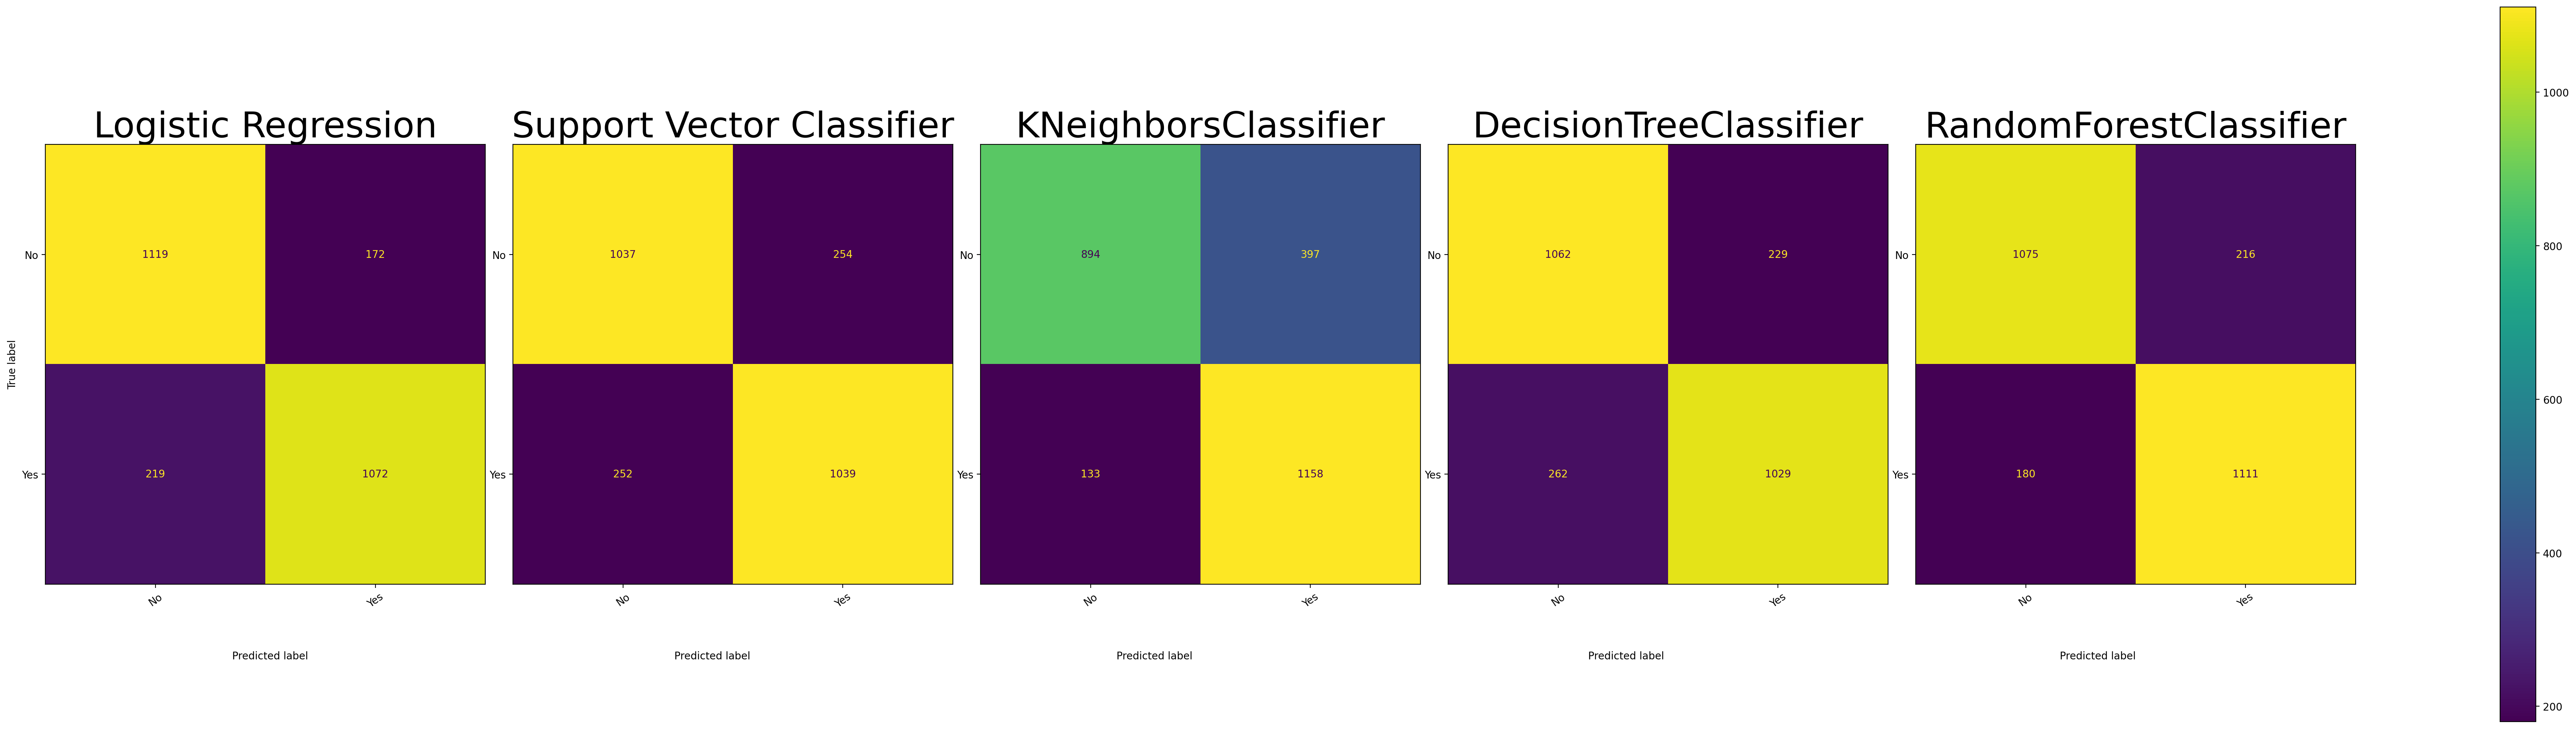

In [ ]:
# Initialising RandomizecSearcvCV classification models as a dictionary
classifiers = {
    "Logistic Regression": randomized_log_model,
    "Support Vector Classifier": randomized_svc_model,
    "KNeighborsClassifier": randomized_knn_model,
    "DecisionTreeClassifier": randomized_dt_model,
    "RandomForestClassifier": randomized_rf_model
}
# Creating subplots of shape 
fig, axes = plt.subplots(1, 5, figsize=(40,10),dpi=200)

# Iterating over the classifiers dictionary using enumerate keyword
for i, (key, classifier) in enumerate(classifiers.items()):
    # Getting predictions from classifier model
    y_pred = classifier.predict(X_test)
    # Creating a Confusion Matrix for classifier model
    cf_matrix = confusion_matrix(y_test, y_pred)
    # Passing that Confusion Matrix in ConfusionMatrixDisplay,,it takes matrix and target feature labels
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=classifier.classes_)
    # Assigning place for Confusion Matrix in subplots and rotating the X_ticks
    disp.plot(ax=axes[i], xticks_rotation=35)
    # Setting title for each Confusion Matrix,,title is key values in classifier dictionary
    disp.ax_.set_title(key,fontdict={'fontsize':35})
    # Intially a color bar will be generated for each matrix seperately,,
    # So,in the function we do remove that color bar and plot it outside of function
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
        
# Displaying xLabel as text in figure        
fig.text(0.08, 0.1, 'Predicted label', ha='left')
fig.text(0.23, 0.1, 'Predicted label', ha='left')
fig.text(0.38, 0.1, 'Predicted label', ha='left')
fig.text(0.54, 0.1, 'Predicted label', ha='left')
fig.text(0.7, 0.1, 'Predicted label', ha='left')
# Setting tight_layout() for subplots
plt.tight_layout()
# Now,getting colorbar for Confusion Matrix
fig.colorbar(disp.im_, ax=axes)
plt.show()        

#### Getting Acuuracy Scores of Classifier models on Test data

In [ ]:
randomized_models_list = [randomized_log_model,randomized_svc_model,randomized_knn_model,
                          randomized_dt_model,randomized_rf_model]
test_accuracy= []

for model in randomized_models_list:
    test_pred = model.predict(X_test)
    test_accuracy.append(accuracy_score(y_test,test_pred))
randomized_models_test_scores_df = pd.DataFrame(data=test_accuracy,index=['randomized_log_model','randomized_svc_model',
                        'randomized_knn_model','randomized_dt_model','randomized_rf_model'],
                          columns=['Test Accuracy Score'])
randomized_models_test_scores_df.index.names = ['Model']
randomized_models_test_scores_df

,Test Accuracy Score
Model,
randomized_log_model,0.848567
randomized_svc_model,0.804028
randomized_knn_model,0.794733
randomized_dt_model,0.809837
randomized_rf_model,0.846631


### Inference : 
**On comparing Confusion Matrices,Accuracy Scores with best parameters choosen by RandomizedSearchCV RandomForest Classifier is performing better than other models.**

## Voting Ensemble Method
**A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.**

**Hard Voting** : In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers. Suppose three classifiers predicted the output class(Yes,Yes,No), so here the majority predicted Yes as output. Hence Yes will be the final prediction.

**Soft Voting**: In soft voting, the output class is the prediction based on the average of probability given to that class. Suppose given some input to three models, the prediction probability for class Yes = (0.30, 0.47, 0.53) and No = (0.20, 0.32, 0.40). So the average for class Yes is 0.4333 and No is 0.3067, the winner is clearly class Yes because it had the highest probability averaged by each classifier.

### Hard Voting & Soft Voting

In [ ]:
voting_estimators = [('Log_model',
                      LogisticRegression(C=10,class_weight='balanced',max_iter=150,penalty='l2',l1_ratio=0,
                                        multi_class='ovr',random_state=31,solver='liblinear',warm_start=True)),
                     ('SVC_model',
                      SVC(C=1,kernel='rbf',gamma='auto',class_weight='balanced',
                          random_state=31,probability=True)),
                     ('KNN_model',
                     KNeighborsClassifier(n_neighbors=20,algorithm='ball_tree',weights='uniform',
                                         p=2,n_jobs=-1)),
                     ('DT_model',
                     DecisionTreeClassifier(criterion='entropy',max_depth=5,class_weight='balanced',
                                           max_features='sqrt',min_samples_split=25,splitter='best',
                                           random_state=31)),
                     ('RF_model',
                     RandomForestClassifier(n_estimators=150,criterion='entropy',class_weight='balanced',
                                           min_samples_split=30,max_depth=None,max_features='sqrt',
                                           n_jobs=-1,random_state=31,warm_start=True))]

hard_voting_classifier = VotingClassifier(estimators=voting_estimators,voting='hard',n_jobs=-1)
soft_voting_classifier = VotingClassifier(estimators=voting_estimators,voting='soft',n_jobs=-1)

In [ ]:
hard_voting_classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('Log_model',
                              LogisticRegression(C=10, class_weight='balanced',
                                                 l1_ratio=0, max_iter=150,
                                                 multi_class='ovr',
                                                 random_state=31,
                                                 solver='liblinear',
                                                 warm_start=True)),
                             ('SVC_model',
                              SVC(C=1, class_weight='balanced', gamma='auto',
                                  probability=True, random_state=31)),
                             ('KNN_model',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   n_jobs=-1, n_neighbors=20)),
                             ('DT_model',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=5,
                                                     max_features='sqrt',
                                                     min_samples_split=25,
                                                     random_state=31)),
                             ('RF_model',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     min_samples_split=30,
                                                     n_estimators=150,
                                                     n_jobs=-1, random_state=31,
                                                     warm_start=True))],
                 n_jobs=-1)

In [ ]:
soft_voting_classifier.fit(X_train,y_train)

VotingClassifier(estimators=[('Log_model',
                              LogisticRegression(C=10, class_weight='balanced',
                                                 l1_ratio=0, max_iter=150,
                                                 multi_class='ovr',
                                                 random_state=31,
                                                 solver='liblinear',
                                                 warm_start=True)),
                             ('SVC_model',
                              SVC(C=1, class_weight='balanced', gamma='auto',
                                  probability=True, random_state=31)),
                             ('KNN_model',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   n_jobs=-1, n_neighbors=20)),
                             ('DT_model',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     max_depth=5,
                                                     max_features='sqrt',
                                                     min_samples_split=25,
                                                     random_state=31)),
                             ('RF_model',
                              RandomForestClassifier(class_weight='balanced',
                                                     criterion='entropy',
                                                     min_samples_split=30,
                                                     n_estimators=150,
                                                     n_jobs=-1, random_state=31,
                                                     warm_start=True))],
                 n_jobs=-1, voting='soft')

**Confusion Matrix for Hard Voting Classifier**

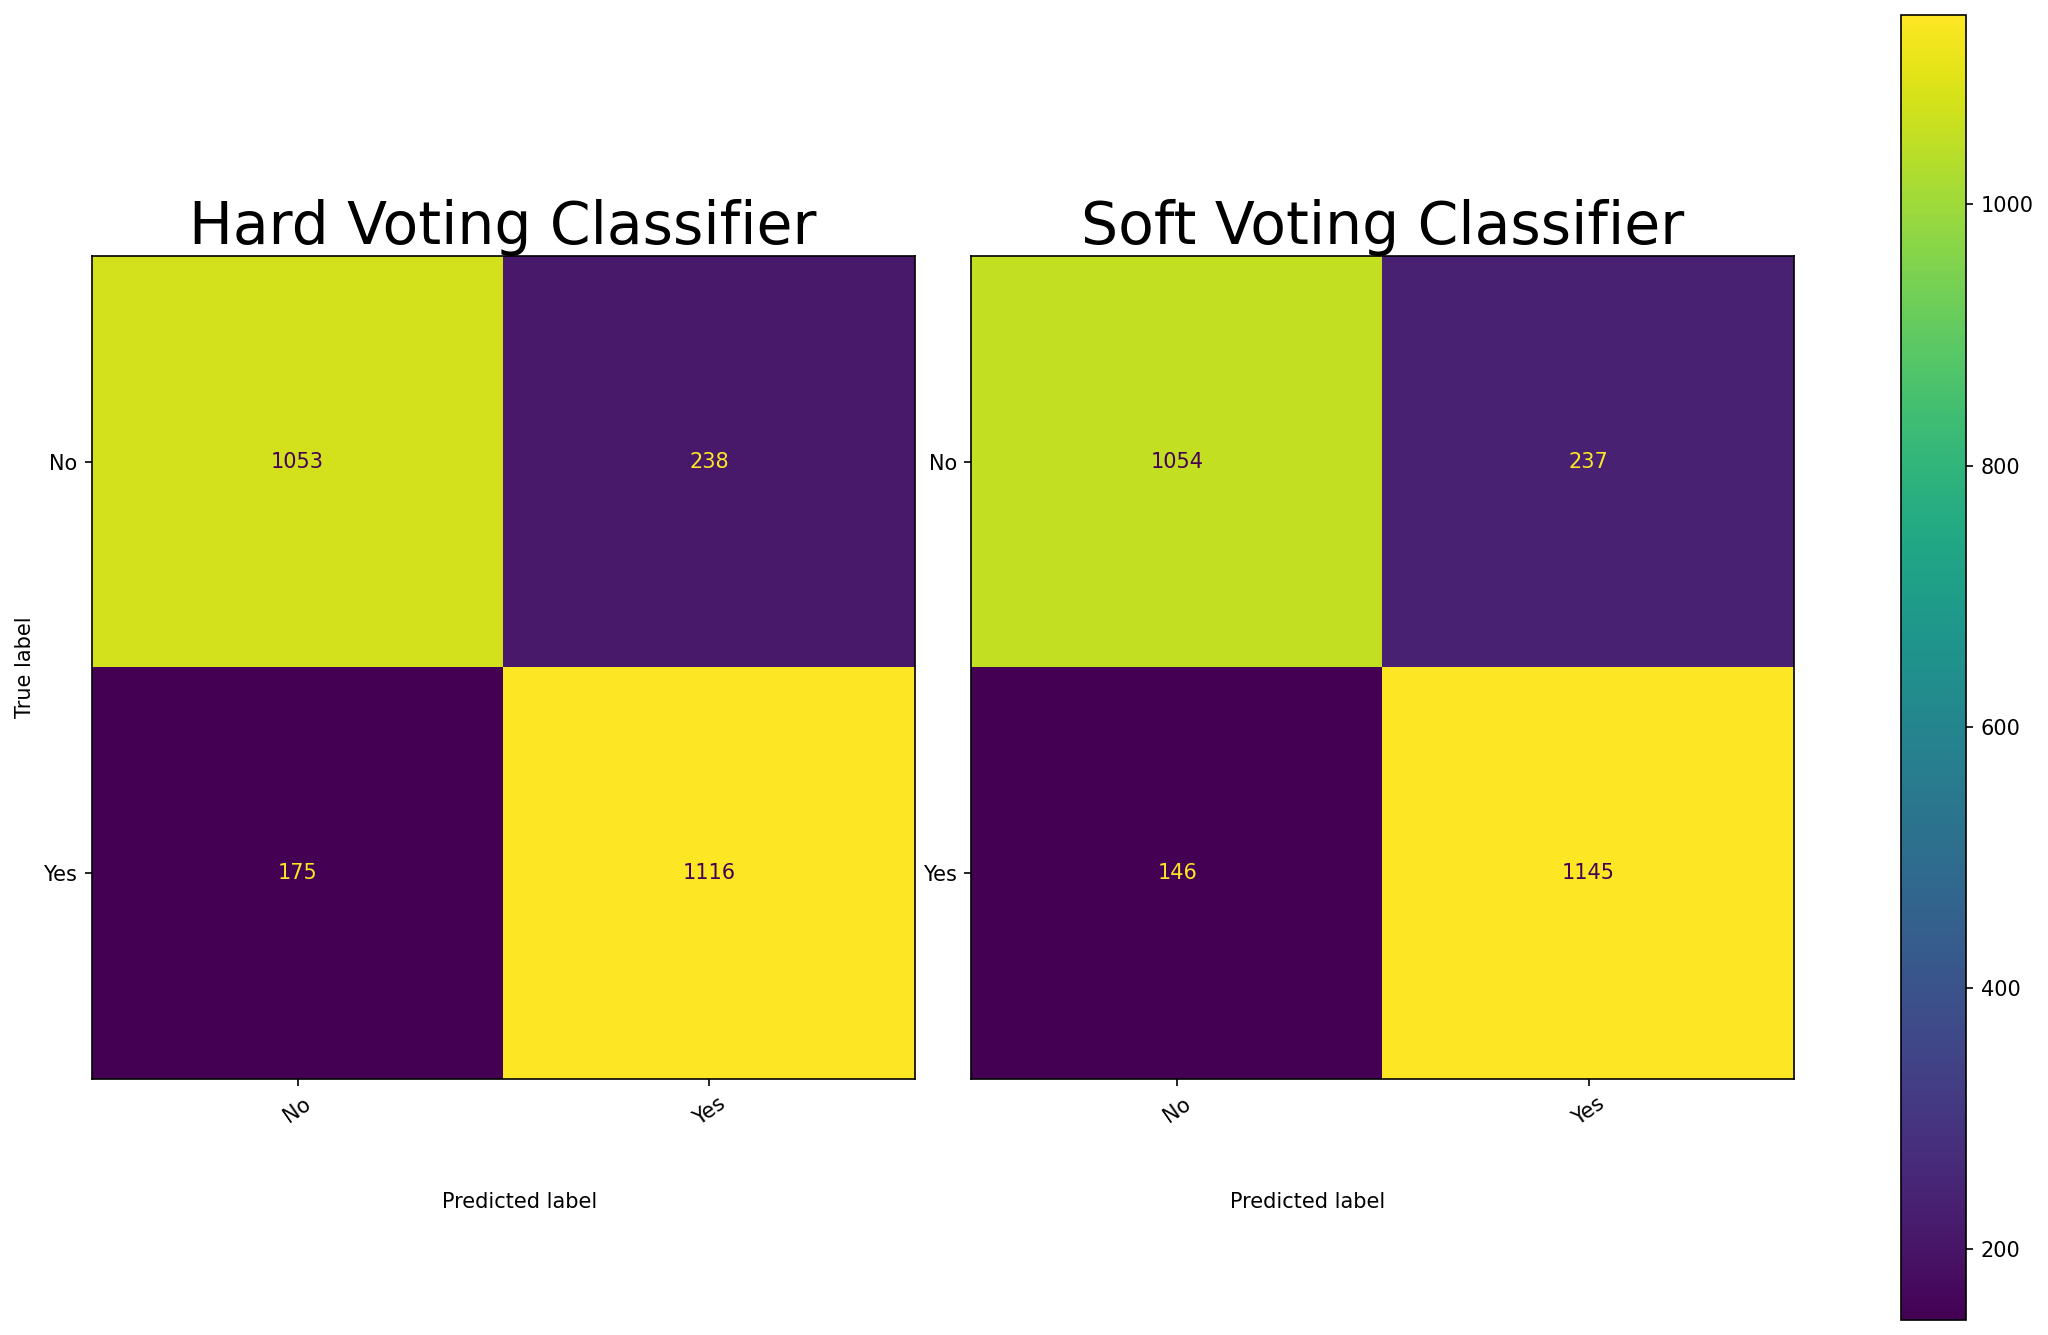

In [ ]:
# Initialising RandomizecSearcvCV classification models as a dictionary
voting_classifiers = {
    "Hard Voting Classifier": hard_voting_classifier,
    "Soft Voting Classifier": soft_voting_classifier
}
# Creating subplots of shape 
fig, axes = plt.subplots(1, 2, figsize=(15,9),dpi=150)

# Iterating over the classifiers dictionary using enumerate keyword
for i, (key, classifier) in enumerate(voting_classifiers.items()):
    # Getting predictions from classifier model
    y_pred = classifier.predict(X_test)
    # Creating a Confusion Matrix for classifier model
    cf_matrix = confusion_matrix(y_test, y_pred)
    # Passing that Confusion Matrix in ConfusionMatrixDisplay,,it takes matrix and target feature labels
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=classifier.classes_)
    # Assigning place for Confusion Matrix in subplots and rotating the X_ticks
    disp.plot(ax=axes[i], xticks_rotation=35)
    # Setting title for each Confusion Matrix,,title is key values in classifier dictionary
    disp.ax_.set_title(key,fontdict={'fontsize':28})
    # Intially a color bar will be generated for each matrix seperately,,
    # So,in the function we do remove that color bar and plot it outside of function
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
        
# Displaying xLabel as text in figure        
fig.text(0.2, 0.1, 'Predicted label', ha='left')
fig.text(0.55, 0.1, 'Predicted label', ha='left')
# Setting tight_layout() for subplots
plt.tight_layout()
# Now,getting colorbar for Confusion Matrix
fig.colorbar(disp.im_, ax=axes)
plt.show()        

#### Getting Accuracy Scores of Hard Voting Classifier and Soft Voting Classifier on Test data

In [ ]:
print('\033[1m'+'Accuracy Score of Hard Voting Classifier on Test data is'+'\033[0m',
      accuracy_score(y_test,hard_voting_classifier.predict(X_test)))
print('\033[1m'+'Accuracy Score of Soft Voting Classifier on Test data is'+'\033[0m',
      accuracy_score(y_test,soft_voting_classifier.predict(X_test)))

Accuracy Score of Hard Voting Classifier on Test data is 0.8400464756003099
Accuracy Score of Soft Voting Classifier on Test data is 0.8516653756777691


### Inference:
**On performing Voting Ensemble Technique,Soft Voting Method is giving a better Accuracy than Hard Voting Method.**

## Bagging Ensemble Method - Bootstrap Aggregating Method
**Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregates their individual predictions (either by voting or by averaging) to form a final prediction.** \
**I used Decision Tree as base estimator.**

**Creating Bagging Classifier with base_estimator DecisionTree Classifier.**

In [ ]:
bagging_dt_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'),
                                          n_estimators=200,
                                          max_samples=0.25,
                                          bootstrap=True,
                                          bootstrap_features=True,
                                          max_features=0.5,
                                          oob_score=True,
                                          warm_start=False,n_jobs=-1,random_state=31)

In [ ]:
bagging_dt_classifier.fit(X_train,y_train)

BaggingClassifier(bootstrap_features=True,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.25, n_estimators=200,
                  n_jobs=-1, oob_score=True, random_state=31)

**Confusion Matrix of Bagging Classifier with base estimator Decision Tree Classifier**

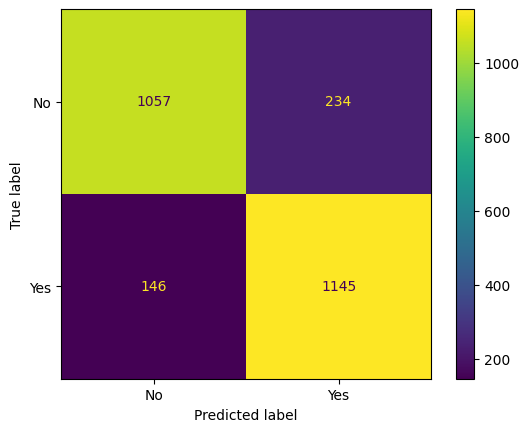

In [ ]:
cf_matrix = confusion_matrix(y_test,bagging_dt_classifier.predict(X_test))
matrix = ConfusionMatrixDisplay(cf_matrix,display_labels=bagging_dt_classifier.classes_)
matrix.plot()

In [ ]:
print('\033[1m'+'Accuracy Score of Bagging Classifier with Decision Tree as estimator is'+'\033[0m',
      accuracy_score(y_test,bagging_dt_classifier.predict(X_test)))
print('\033[1m'+'Out Of Bag(OOB) Score of Bagging Classifier with Decision Tree as estimator is'+'\033[0m',
      bagging_dt_classifier.oob_score_)

Accuracy Score of Bagging Classifier with Decision Tree as estimator is 0.8528272656855151
Out Of Bag(OOB) Score of Bagging Classifier with Decision Tree as estimator is 0.8511105371900827


## Boosting Methods
### 1. Ada-Boosting
### 2. Gradient-Boosting
### 3. XG Boost

**Creating Parameter Grids for Ada-Boost,Gradient Boost and XG Boost models**

In [ ]:
ada_boost_param_grid = {'n_estimators':[250,300,350,400],
                       'learning_rate':[0.01]}
gradient_boost_param_grid = {'loss':['log_loss'],
                            'learning_rate':[0.01,0.1],
                            'n_estimators':[100,150,200,250],
                            'criterion':['friedman_mse','sqaured_error'],
                            'min_samples_split':[2,10,25,30],
                            'max_depth':[1,3,5,None],
                            'max_features':['auto']}
xgb_param_grid = {'booster':['gblinear','gbtree'],
                 'n_estimators':[100,150,200],
                 'max_depth':[2,3,6,None],
                 'learning_rate':[0.1,0.01,0.05]}

In [ ]:
adaboost_grid_model = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,class_weight='balanced',
                                                     max_features='sqrt',min_samples_split=25,splitter='best',
                                                     random_state=31)),
                                   param_grid=ada_boost_param_grid,
                                   scoring='accuracy',n_jobs=-1,cv=10,return_train_score=True)

randomized_gradientboost_model = RandomizedSearchCV(GradientBoostingClassifier(),
                                                   param_distributions=gradient_boost_param_grid,
                                                   scoring='accuracy',n_jobs=-1,cv=10,random_state=31,
                                                   return_train_score=True)

xgb_grid_model = GridSearchCV(XGBClassifier(random_state=31,n_jobs=-1),param_grid=xgb_param_grid,
                             cv=10,scoring='accuracy',n_jobs=-1,return_train_score=True)


Fitting the models

In [ ]:
adaboost_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                           criterion='entropy',
                                                                           max_depth=5,
                                                                           max_features='sqrt',
                                                                           min_samples_split=25,
                                                                           random_state=31)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01],
                         'n_estimators': [250, 300, 350, 400]},
             return_train_score=True, scoring='accuracy')

In [ ]:
randomized_gradientboost_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'sqaured_error'],
                                        'learning_rate': [0.01, 0.1],
                                        'loss': ['log_loss'],
                                        'max_depth': [1, 3, 5, None],
                                        'max_features': ['auto'],
                                        'min_samples_split': [2, 10, 25, 30],
                                        'n_estimators': [100, 150, 200, 250]},
                   random_state=31, return_train_score=True,
                   scoring='accuracy')

In [ ]:
xgb_grid_model.fit(X_train,y_train.replace(to_replace=['No','Yes'],value=[0,1]))

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=31, ...),
             n_jobs=-1,
             param_grid={'booster': ['gblinear', 'gbtree'],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [2, 3, 6, None],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, scoring='accuracy')

### Confusion Matrices of Ada-Boost,Gradient-Boost Models

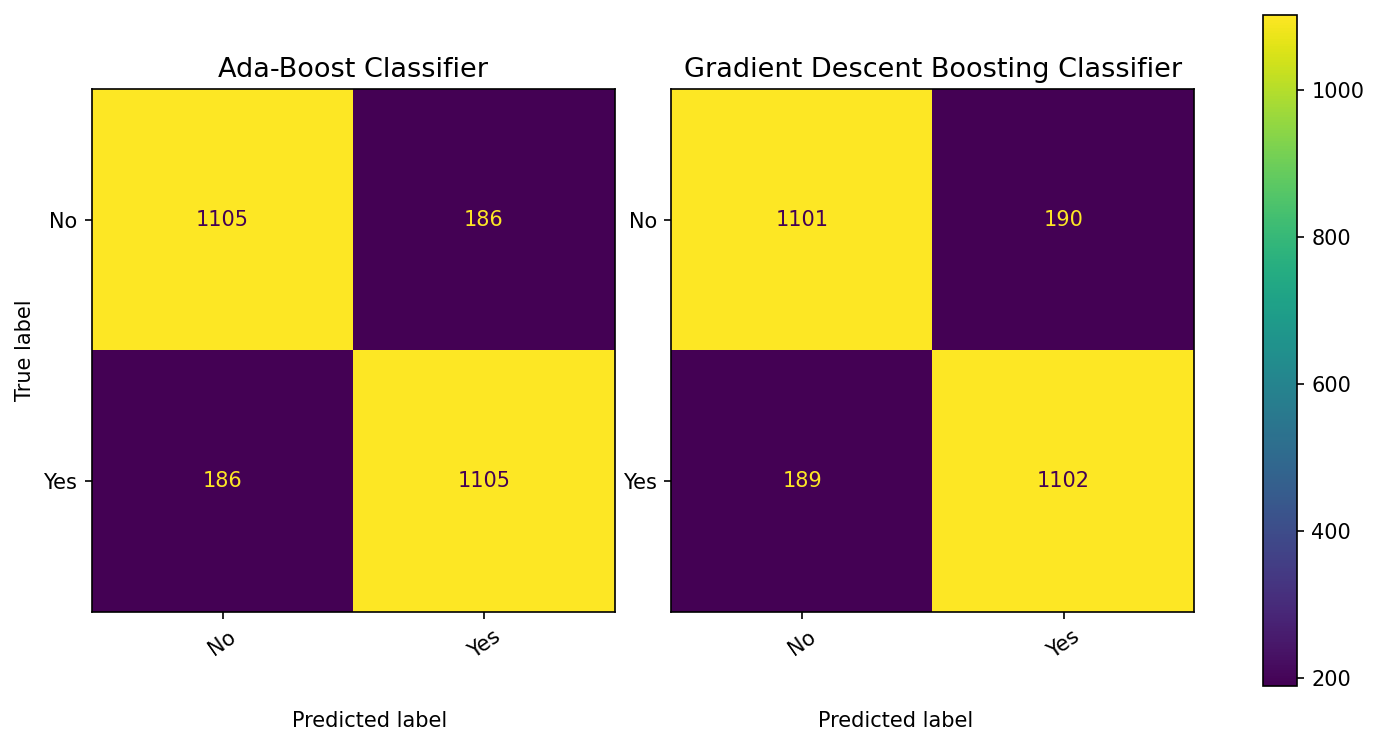

In [ ]:
# Initialising Boosting classification models as a dictionary
boosting_classifiers = {
    "Ada-Boost Classifier": adaboost_grid_model,
    "Gradient Descent Boosting Classifier": randomized_gradientboost_model
}
# Creating subplots of shape 
fig, axes = plt.subplots(1, 2, figsize=(10,5),dpi=150)

# Iterating over the classifiers dictionary using enumerate keyword
for i, (key, classifier) in enumerate(boosting_classifiers.items()):
    # Getting predictions from classifier model
    y_pred = classifier.predict(X_test)
    # Creating a Confusion Matrix for classifier model
    cf_matrix = confusion_matrix(y_test, y_pred)
    # Passing that Confusion Matrix in ConfusionMatrixDisplay,,it takes matrix and target feature labels
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=classifier.classes_)
    # Assigning place for Confusion Matrix in subplots and rotating the X_ticks
    disp.plot(ax=axes[i], xticks_rotation=35)
    # Setting title for each Confusion Matrix,,title is key values in classifier dictionary
    disp.ax_.set_title(key,fontdict={'fontsize':13})
    # Intially a color bar will be generated for each matrix seperately,,
    # So,in the function we do remove that color bar and plot it outside of function
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
        
# Displaying xLabel as text in figure        
fig.text(0.2, 0.01, 'Predicted label', ha='left')
fig.text(0.55, 0.01, 'Predicted label', ha='left')
# Setting tight_layout() for subplots
plt.tight_layout()
# Now,getting colorbar for Confusion Matrix
fig.colorbar(disp.im_, ax=axes)
plt.show()

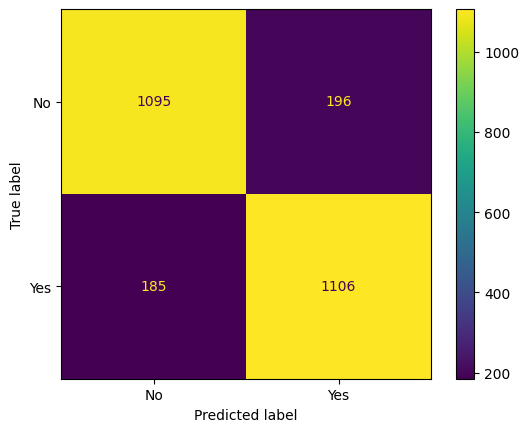

In [ ]:
xgb_preds = xgb_grid_model.predict(X_test)
cf_matrix = confusion_matrix(y_test.replace(to_replace=['No','Yes'],value=[0,1]),xgb_preds)
fig = ConfusionMatrixDisplay(cf_matrix,display_labels=['No','Yes'])
fig.plot()

In [ ]:
boosting_models_list = [adaboost_grid_model,randomized_gradientboost_model]
test_accuracy= []

for boosting_model in boosting_models_list:
    test_pred = boosting_model.predict(X_test)
    test_accuracy.append(accuracy_score(y_test,test_pred))
test_accuracy.append(accuracy_score(y_test.replace(to_replace=['No','Yes'],value=[0,1]),xgb_grid_model.predict(X_test)))    
boosting_models_test_scores_df = pd.DataFrame(data=test_accuracy,index=['adaboost_grid_model','randomized_gradientboost_model','xgb_grid_model'],
                          columns=['Test Accuracy Score'])
boosting_models_test_scores_df.index.names = ['Model']
boosting_models_test_scores_df

,Test Accuracy Score
Model,
adaboost_grid_model,0.855926
randomized_gradientboost_model,0.853215
xgb_grid_model,0.852440


**Getting Accuracy Scores of all models**

In [ ]:
all_models = [randomized_log_model,randomized_svc_model,randomized_knn_model,randomized_dt_model,randomized_rf_model,
              adaboost_grid_model,randomized_gradientboost_model]

In [ ]:
test_accuracy= []
for model in all_models:
    test_pred = model.predict(X_test)
    test_accuracy.append(accuracy_score(y_test,test_pred))
test_accuracy.append(accuracy_score(y_test.replace(to_replace=['No','Yes'],value=[0,1]),xgb_grid_model.predict(X_test)))    

In [ ]:
np.round(test_accuracy,4)

array([0.8486, 0.804 , 0.7947, 0.8098, 0.8466, 0.8559, 0.8532, 0.8524])

In [ ]:
final_accuracy_df = pd.DataFrame({'Model':['Logistic Regression','Support Vector Model','K-Neighbors Model','Decision Tree model','Random Forest Model',
              'Ada-Boost Model','Gradient-Boost Model','XG Boost Model'],
              'Accuracy':test_accuracy
              })

In [ ]:
final_accuracy_df

,Model,Accuracy
0,Logistic Regression,0.848567
1,Support Vector Model,0.804028
2,K-Neighbors Model,0.794733
3,Decision Tree model,0.809837
4,Random Forest Model,0.846631
5,Ada-Boost Model,0.855926
6,Gradient-Boost Model,0.853215
7,XG Boost Model,0.852440


In [ ]:
final_accuracy_df.to_csv('Final_Accuarcy_df.csv',index=False)

In [ ]:
colors = ['#03c856','#bdc303','#03c856','#ec7171','#b34040','#b22a2a','#ad0000']

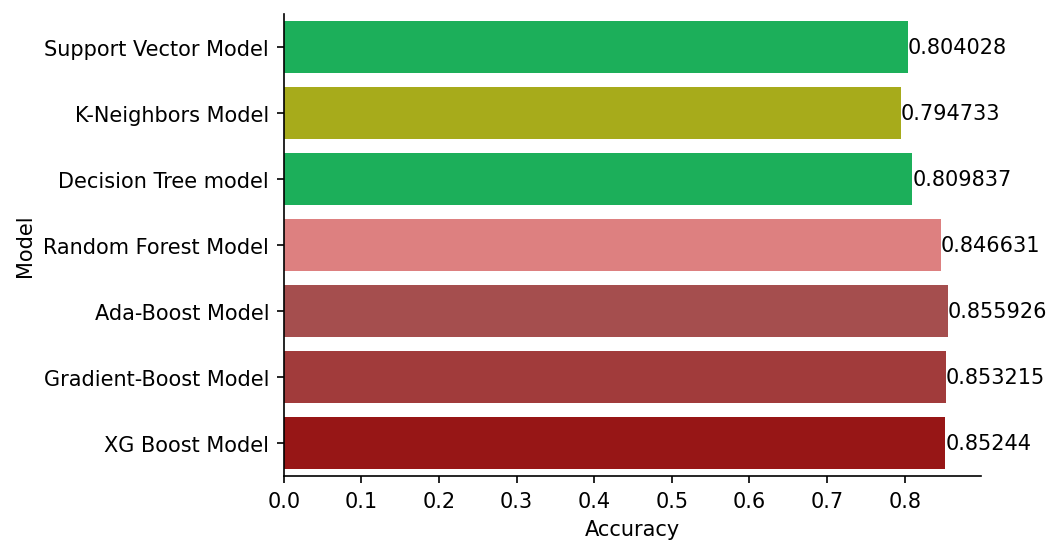

In [ ]:
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(6,4),dpi=150)
plot = sns.barplot(data=final_accuracy_df,y='Model',x='Accuracy',orient='h')
sns.despine()
for i in plot.containers:
  plot.bar_label(i,)



### **Inference :**
**Performance of Boosting models is better than other models.**